In [1]:
from glob import glob
from os.path import join
import pandas as pd
import numpy as np

from maps.pings import Pings
from maps.maps import FoliumMap

location_data_dirpath = '../../data/locations/'
photo_metadata_dirpath = '../../data/photo_metadata'

pings_data_path = join(location_data_dirpath, 'pings.hdf')
posts_path = join(photo_metadata_dirpath, 'posts.hdf')

%reload_ext autoreload
%autoreload 2

In [2]:
# load geolocated photos
posts = pd.read_hdf(posts_path, 'data')
photos = posts[~posts.latitude.isna()]

In [3]:
# import pickle

# # load all pings
# ping_data = pd.read_hdf(pings_data_path, 'data')
# ping_data = ping_data[ping_data.accuracy < 3000]
# ping_data = ping_data[ping_data.altitude < 4000]

# # geocode trip pings
# pings = Pings(ping_data.loc['2019-07-24':], 2)
# pings.cluster(use_weights=False, n_clusters=500)
# pings.build_geocodes()
# pings.geocode()

# #save clustered pings
# pickled_pings_path = join(location_data_dirpath, 'clustered_pings.pkl')
# with open(pickled_pings_path, 'wb') as file:
#     pickle.dump(pings, file)

import pickle

# load clustered pings
pickled_pings_path = join(location_data_dirpath, 'clustered_pings.pkl')
with open(pickled_pings_path, 'rb') as file:
    pings = pickle.load(file)

In [56]:
# label time periods
time_periods = {
    'July': ('2019-07-24', '2019-07-28'),
    'August-November': ('2019-08-11', '2019-11-09'),
    'December': ('2019-12-01', '2019-12-24'),
    'February': ('2020-02-25', '2020-03-17')
}

pings.label_timespans('time_period', time_periods)

In [57]:
trip_ids = {'Highway 1': ('2019-07-24 00:10:30', '2019-07-31 23:54:08'),
 'France': ('2019-08-12 03:50:39', '2019-08-21 18:47:50'),
 'Italian Coast': ('2019-08-20 15:01:17', '2019-09-11 13:55:10'),
 'England': ('2019-09-11 07:04:16', '2019-09-25 14:33:45'),
 'Central Europe': ('2019-09-25 10:08:30', '2019-10-22 12:09:37'),
 'Catalonia': ('2019-11-02 11:49:07', '2019-11-07 14:22:22'),
 'Morocco': ('2019-12-03 20:36:19', '2019-12-13 02:15:52'),
 'Italian Alps': ('2019-12-13 10:43:52', '2019-12-24 03:23:37'),
 'Rocky Mountains': ('2020-02-25 00:07:38', '2020-03-17 23:57:50')}

pings.label_timespans('trip_id', trip_ids)

In [9]:
# drives, flights = trips.segments['land'], trips.segments['air']

# highway1_drive = [d for d in drives if 'San Diego' in d.cities][0]
# france_flights = [f for f in flights if 'FR' in f.countries and f.stop_ts<'2019-11-01']
# italian_coast_flights = [f for f in flights if 'IT' in f.countries and f.stop_ts<'2019-11-01']
# england_flights = [f for f in flights if 'GB' in f.countries and f.stop_ts < '2019-09-26']
# central_europe_flights = [f for f in flights if 'CZ' in f.countries]
# catalonia_flights = [f for f in flights if 'ES' in f.countries and f.stop_ts<'2019-12-01']
# morocco_flights = [f for f in flights if 'MA' in f.countries]
# italian_alps_flights = [f for f in flights if 'IT' in f.countries and f.start_ts>'2019-12-01']
# rockies_drive = [d for d in drives if 'Wyoming' in d.states][0]

# # label trips
# trip_ids = {
#     'Highway 1': (highway1_drive.start_ts, highway1_drive.stop_ts),
#     'France': (france_flights[0].start_ts, france_flights[-1].stop_ts),
#     'Italian Coast': (italian_coast_flights[0].start_ts, italian_coast_flights[-1].stop_ts),
#     'England': (england_flights[0].start_ts, england_flights[-1].stop_ts),
#     'Central Europe': (central_europe_flights[0].start_ts, central_europe_flights[-1].stop_ts),
#     'Catalonia': (catalonia_flights[0].start_ts, catalonia_flights[-1].stop_ts),
#     'Morocco': (morocco_flights[0].start_ts, morocco_flights[-1].stop_ts),
#     'Italian Alps': (italian_alps_flights[0].start_ts, italian_alps_flights[-1].stop_ts),
#     'Rocky Mountains': (rockies_drive.start_ts, rockies_drive.stop_ts)}

# Composite map

In [58]:
from maps.trips import TripGenerator

In [59]:
# compile trip generator
#trips = TripGenerator(pings, photos[['Power' in x for x in photos.index.get_level_values(2)]])
trips = TripGenerator(pings, photos)

# Generate trip

In [31]:
trip_names = ['Highway 1',
'France',
'Italian Coast',
'England',
'Central Europe',
'Catalonia',
'Morocco',
'Italian Alps',
'Rocky Mountains']

In [72]:
trip_name = 'Central Europe'
filename = '-'.join([x.lower() for x in trip_name.split()]) +'.html'

In [102]:
trip_ids = (trip_name,)
trip = trips.get_trip(*trip_ids)
trip.build_map(zoom_start=6, max_zoom=15)
trip.add_travel_to_map(weight=3, drive_color='darkred')
trip.add_photos_to_map(True, maxClusterRadius=150, disableClusteringAtZoom=10, zoomToBoundsOnClick=True)
trip.add_heatmap_to_map()
#trip.add_video_to_map() 
trip.add_layer_control()

In [103]:
trip.map

In [78]:
feature_group_sub_group.

<module 'folium.plugins.feature_group_sub_group' from '/Users/Sebi/.virtualenvs/web/lib/python3.6/site-packages/folium/plugins/feature_group_sub_group.py'>

In [ ]:
FloatImage()

In [79]:
from folium.plugins import feature_group_sub_group, FloatImage

In [70]:
from folium.plugins import AntPath
from folium import Map

In [ ]:
AntPath()

In [ ]:
"""
fix antpath ugliness
fix messed up captions (roussillon, gilgen, saignon..)
fix tooltip boxes
add ski/hike track popups
add flight info to tooltips
make a single mega-map using subgroups ?
resample antpath to every 4 hours ?
"""

In [51]:
from modules.jpeg import JPEG_Metadata

class Test(JPEG_Metadata):
    
    @property
    def CASE_ID(self):
        """
        Four cases:
        
        1. GPS time included --> in UTC already
        2. GPS included, no GPS time --> TimeZones API to get UTC
        3. No GPS, but local time --> TimeZones API to get UTC, using KW for location
        4. No GPS, non-local (camera) --> constant offset to UTC
        
        """
        
        # Case 1
        if self.geotagged:
            try:
                _ = self.exif.gps_datestamp
                CASE_ID = 1
            except:
                CASE_ID = 2
        else:
            if 'iPhone' in self.source:
                CASE_ID = 3
            else:
                CASE_ID = 4
        
        return CASE_ID
    
def GET_CASE_ID(record):
    return Test(record.path).CASE_ID

In [94]:
trip_ids = ('France', 'Italian Coast', 'England', 'Central Europe')
trip = trips.get_trip(*trip_ids)
trip.photos['CASE_ID'] = trip.photos.apply(GET_CASE_ID, axis=1)

/Users/Sebi/.virtualenvs/web/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [95]:
CASE_ID = 4
trip.photos = trip.photos[trip.photos.CASE_ID==CASE_ID]
trip.build_map(zoom_start=5)
trip.add_travel_to_map(weight=6, drive_color='black')
trip.add_photos_to_map(True, maxClusterRadius=50)
trip.add_heatmap_to_map()
#trip.add_video_to_map() 
trip.add_layer_control()

In [96]:
trip.map

In [727]:
trip.save_map('../travel/maps/{:s}'.format(filename))

In [ ]:
photo taken 10:52 tagged 9:52 by camera

In [99]:

m = FoliumMap()

#pts = pings.pings.loc['CMB']['2019-10-03 14:15:00': '2019-10-03 14:30:00'][Pings.GPS_INDEX]

pts = pings.pings.loc['CMB']['2019-09-07 09:15:00': '2019-09-07 16:30:00'][Pings.GPS_INDEX]

m.build_map(pts.values.mean(axis=0), zoom_start=12, width='50%')
m.add_bubbles(pts.values, tooltips=pts.index.values, color='blue')


m.map

In [105]:
p = get_pings(pings)
tagged = photos[photos.geotagged]

In [168]:
# match photos with nearest ping
p['TIME_PING'] = p.index
matches = pd.merge_asof(tagged.timestamp, p, left_on='timestamp', right_index=True, direction='nearest')
matches = matches[['timestamp', 'latitude', 'longitude', 'TIME_PING']]
OUT = tagged.join(matches, rsuffix='_MATCH')
OUT['PHONE_TIME'] = tagged.timestamp

In [178]:
OUT['TIME_ERROR'] = np.abs((OUT.PHONE_TIME - OUT.TIME_PING).apply(lambda x: x.total_seconds()))
OUT['GPS_ERROR'] = [haversine(*x) for x in zip(OUT[['latitude', 'longitude']].values, OUT[['latitude_MATCH', 'longitude_MATCH']].values)]

In [196]:
TEST = OUT[OUT.TIME_ERROR < 3600/2]

In [197]:
TEST.GPS_ERROR.max()

1.7483939774364887

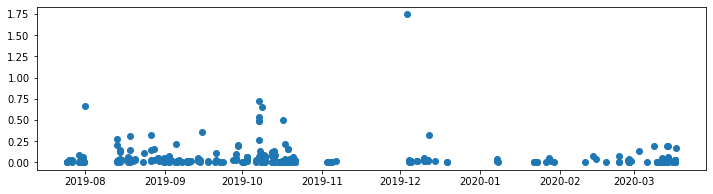

In [199]:
fig, ax = plt.subplots(figsize=(12, 3))
ax.scatter(TEST.PHONE_TIME, TEST.GPS_ERROR)

In [177]:
import numpy as np
from modules.utilities import haversine
import matplotlib.pyplot as plt

In [162]:
matches

timestamp   latitude  \
album           filename     source                                     
CA Highway 1    IMG_9558.jpg iPhone SE 2019-07-25 01:20:35  32.683499   
                IMG_9562.jpg iPhone SE 2019-07-25 01:50:16  32.684450   
                IMG_9569.jpg iPhone SE 2019-07-25 02:38:55  32.717751   
                IMG_9715.jpg iPhone SE 2019-07-25 19:27:54  32.841314   
                IMG_9580.jpg iPhone SE 2019-07-25 19:31:09  32.841953   
...                                                    ...        ...   
Rocky Mountains IMG_9729.jpg iPhone 7  2020-03-16 17:42:31  44.866455   
                IMG_9731.jpg iPhone 7  2020-03-16 17:44:10  44.867059   
                IMG_5128.jpg iPhone SE 2020-03-16 21:10:44  43.189554   
                IMG_5131.jpg iPhone SE 2020-03-16 21:16:03  43.189639   
                IMG_9741.jpg iPhone 7  2020-03-17 00:37:14  42.563817   

                                         longitude  
album           filename     source                 
CA Highway 1    IMG_9558.jpg iPhone SE -117.187266  
                IMG_9562.jpg iPhone SE -117.179478  
                IMG_9569.jpg iPhone SE -117.158518  
                IMG_9715.jpg iPhone SE -117.281780  
                IMG_9580.jpg iPhone SE -117.281549  
...                                            ...  
Rocky Mountains IMG_9729.jpg iPhone 7  -111.353419  
                IMG_9731.jpg iPhone 7  -111.354623  
                IMG_5128.jpg iPhone SE -112.343908  
                IMG_5131.jpg iPhone SE -112.343581  
                IMG_9741.jpg iPhone 7  -114.301957  

[311 rows x 3 columns]

In [161]:
OUT.timestamp_MATCH.iloc[:5]

album         filename      source   
CA Highway 1  IMG_9558.jpg  iPhone SE   2019-07-25 01:20:35
              IMG_9562.jpg  iPhone SE   2019-07-25 01:50:16
              IMG_9569.jpg  iPhone SE   2019-07-25 02:38:55
              IMG_9715.jpg  iPhone SE   2019-07-25 19:27:54
              IMG_9580.jpg  iPhone SE   2019-07-25 19:31:09
Name: timestamp_MATCH, dtype: datetime64[ns]

In [157]:
OUT.PHONE_TIME

album            filename      source   
CA Highway 1     IMG_9558.jpg  iPhone SE   2019-07-25 01:20:35
                 IMG_9562.jpg  iPhone SE   2019-07-25 01:50:16
                 IMG_9569.jpg  iPhone SE   2019-07-25 02:38:55
                 IMG_9715.jpg  iPhone SE   2019-07-25 19:27:54
                 IMG_9580.jpg  iPhone SE   2019-07-25 19:31:09
                                                   ...        
Rocky Mountains  IMG_9729.jpg  iPhone 7    2020-03-16 17:42:31
                 IMG_9731.jpg  iPhone 7    2020-03-16 17:44:10
                 IMG_5128.jpg  iPhone SE   2020-03-16 21:10:44
                 IMG_5131.jpg  iPhone SE   2020-03-16 21:16:03
                 IMG_9741.jpg  iPhone 7    2020-03-17 00:37:14
Name: PHONE_TIME, Length: 311, dtype: datetime64[ns]

In [ ]:
plt()

In [ ]:
photo_gps = photo_gps.set_index('timestamp')
photo_gps['dt_ping'] = compute_timedelta(photo_gps, 'time_ping')

In [104]:
def get_pings(pings):

    min_ping_accuracy = 250 # meters
    pings = pings.flattened[~pings.flattened.index.duplicated()]
    pings['time_ping'] = pings.index
    pings = pings[pings.accuracy < min_ping_accuracy]
    return pings


In [212]:
canon = photos[['Power' in x for x in photos.index.get_level_values(2)]]

In [203]:
photo = photos[~photos.geotagged.astype(bool)].iloc[2]

In [216]:
for path in canon.path.values:
    jpeg = JPEG_Metadata(path)
    print(jpeg.exif.offset_time)

-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00
-07:00

In [747]:
harburg_photos = trips.photos[trips.photos.caption.apply(lambda x: 'Harburg' in x)]
harburg_photos[['timestamp', 'latitude', 'longitude', 'time_ping']]

timestamp  \
album   filename     source                                             
Germany IMG_1653.jpg PowerShot G9 X Mark II       2019-10-03 06:18:54   
        IMG_1662.jpg Canon PowerShot G9 X Mark II 2019-10-03 06:20:35   
        IMG_1672.jpg Canon PowerShot G9 X Mark II 2019-10-03 06:26:11   
        IMG_1696.jpg PowerShot G9 X Mark II       2019-10-03 07:04:07   
        IMG_1702.jpg PowerShot G9 X Mark II       2019-10-03 07:11:26   

                                                    latitude  longitude  \
album   filename     source                                               
Germany IMG_1653.jpg PowerShot G9 X Mark II        48.975470  10.448777   
        IMG_1662.jpg Canon PowerShot G9 X Mark II  48.975470  10.448777   
        IMG_1672.jpg Canon PowerShot G9 X Mark II  48.999048  10.413956   
        IMG_1696.jpg PowerShot G9 X Mark II        49.069086  10.319726   
        IMG_1702.jpg PowerShot G9 X Mark II        49.069555  10.316244   

                                                                time_ping  
album   filename     source                                                
Germany IMG_1653.jpg PowerShot G9 X Mark II       2019-10-03 06:18:41.000  
        IMG_1662.jpg Canon PowerShot G9 X Mark II 2019-10-03 06:18:41.000  
        IMG_1672.jpg Canon PowerShot G9 X Mark II 2019-10-03 06:26:50.000  
        IMG_1696.jpg PowerShot G9 X Mark II       2019-10-03 06:59:49.826  
        IMG_1702.jpg PowerShot G9 X Mark II       2019-10-03 07:18:37.000

In [702]:
trips.photos[trips.photos.caption.apply(lambda x: 'Harburg Castle' in x)]

path  \
album   filename     source                                                                      
Germany IMG_1696.jpg PowerShot G9 X Mark II  /Volumes/bernasek_t5/photos/lightroom/rendered...   
        IMG_1702.jpg PowerShot G9 X Mark II  /Volumes/bernasek_t5/photos/lightroom/rendered...   

                                                      timestamp  \
album   filename     source                                       
Germany IMG_1696.jpg PowerShot G9 X Mark II 2019-10-03 07:04:07   
        IMG_1702.jpg PowerShot G9 X Mark II 2019-10-03 07:11:26   

                                                   time_shot_pst  \
album   filename     source                                        
Germany IMG_1696.jpg PowerShot G9 X Mark II  2019:10:03 07:04:07   
        IMG_1702.jpg PowerShot G9 X Mark II  2019:10:03 07:11:26   

                                                 time_shot_local  \
album   filename     source                                        
Germany IMG_1696.jpg PowerShot G9 X Mark II  2019:10:03 07:04:07   
        IMG_1702.jpg PowerShot G9 X Mark II  2019:10:03 07:11:26   

                                                   time_rendered geotagged  \
album   filename     source                                                  
Germany IMG_1696.jpg PowerShot G9 X Mark II  2020:04:09 17:03:01     False   
        IMG_1702.jpg PowerShot G9 X Mark II  2020:04:09 17:03:04     False   

                                            latitude_native longitude_native  \
album   filename     source                                                    
Germany IMG_1696.jpg PowerShot G9 X Mark II             NaN              NaN   
        IMG_1702.jpg PowerShot G9 X Mark II             NaN              NaN   

                                             latitude_ping  longitude_ping  \
album   filename     source                                                  
Germany IMG_1696.jpg PowerShot G9 X Mark II      49.069086       10.319726   
        IMG_1702.jpg PowerShot G9 X Mark II      49.069555       10.316244   

                                             ...  \
album   filename     source                  ...   
Germany IMG_1696.jpg PowerShot G9 X Mark II  ...   
        IMG_1702.jpg PowerShot G9 X Mark II  ...   

                                                                           caption  \
album   filename     source                                                          
Germany IMG_1696.jpg PowerShot G9 X Mark II  Harburg Castle - Harburg, Bavaria, DE   
        IMG_1702.jpg PowerShot G9 X Mark II  Harburg Castle - Harburg, Bavaria, DE   

                                            city state  country  caption_auto  \
album   filename     source                                                     
Germany IMG_1696.jpg PowerShot G9 X Mark II  NaN   NaN      NaN           NaN   
        IMG_1702.jpg PowerShot G9 X Mark II  NaN   NaN      NaN           NaN   

                                             place_id  imgur_id  \
album   filename     source                                       
Germany IMG_1696.jpg PowerShot G9 X Mark II       NaN   UufJJXo   
        IMG_1702.jpg PowerShot G9 X Mark II       NaN   E2zQJqC   

                                                                  imgur_link  \
album   filename     source                                                    
Germany IMG_1696.jpg PowerShot G9 X Mark II  https://i.imgur.com/UufJJXo.jpg   
        IMG_1702.jpg PowerShot G9 X Mark II  https://i.imgur.com/E2zQJqC.jpg   

                                             imgur_album_hash  \
album   filename     source                                     
Germany IMG_1696.jpg PowerShot G9 X Mark II           XOMowfm   
        IMG_1702.jpg PowerShot G9 X Mark II           XOMowfm   

                                                   time_uploaded  
album   filename     source                                       
Germany IMG_1696.jpg PowerShot G9 X Mark II  2020:04:10 13:45:43  
    

In [700]:
trips.photos.loc['Germany']

path  \
filename     source                                                                            
IMG_5438.jpg iPhone 7                      /Volumes/bernasek_t5/photos/lightroom/rendered...   
IMG_5449.jpg iPhone 7                      /Volumes/bernasek_t5/photos/lightroom/rendered...   
IMG_5451.jpg iPhone 7                      /Volumes/bernasek_t5/photos/lightroom/rendered...   
IMG_5459.jpg iPhone 7                      /Volumes/bernasek_t5/photos/lightroom/rendered...   
IMG_5478.jpg iPhone 7                      /Volumes/bernasek_t5/photos/lightroom/rendered...   
IMG_1653.jpg PowerShot G9 X Mark II        /Volumes/bernasek_t5/photos/lightroom/rendered...   
IMG_1662.jpg Canon PowerShot G9 X Mark II  /Volumes/bernasek_t5/photos/lightroom/rendered...   
IMG_1672.jpg Canon PowerShot G9 X Mark II  /Volumes/bernasek_t5/photos/lightroom/rendered...   
IMG_1696.jpg PowerShot G9 X Mark II        /Volumes/bernasek_t5/photos/lightroom/rendered...   
IMG_1702.jpg PowerShot G9 X Mark II        /Volumes/bernasek_t5/photos/lightroom/rendered...   
IMG_1821.jpg Canon PowerShot G9 X Mark II  /Volumes/bernasek_t5/photos/lightroom/rendered...   
IMG_1822.jpg Canon PowerShot G9 X Mark II  /Volumes/bernasek_t5/photos/lightroom/rendered...   
IMG_1837.jpg PowerShot G9 X Mark II        /Volumes/bernasek_t5/photos/lightroom/rendered...   
IMG_1853.jpg Canon PowerShot G9 X Mark II  /Volumes/bernasek_t5/photos/lightroom/rendered...   

                                                    timestamp  \
filename     source                                             
IMG_5438.jpg iPhone 7                     2019-10-02 08:26:20   
IMG_5449.jpg iPhone 7                     2019-10-02 08:46:40   
IMG_5451.jpg iPhone 7                     2019-10-02 08:46:46   
IMG_5459.jpg iPhone 7                     2019-10-02 08:47:37   
IMG_5478.jpg iPhone 7                     2019-10-02 11:08:23   
IMG_1653.jpg PowerShot G9 X Mark II       2019-10-03 06:18:54   
IMG_1662.jpg Canon PowerShot G9 X Mark II 2019-10-03 06:20:35   
IMG_1672.jpg Canon PowerShot G9 X Mark II 2019-10-03 06:26:11   
IMG_1696.jpg PowerShot G9 X Mark II       2019-10-03 07:04:07   
IMG_1702.jpg PowerShot G9 X Mark II       2019-10-03 07:11:26   
IMG_1821.jpg Canon PowerShot G9 X Mark II 2019-10-04 06:11:27   
IMG_1822.jpg Canon PowerShot G9 X Mark II 2019-10-04 06:31:46   
IMG_1837.jpg PowerShot G9 X Mark II       2019-10-04 06:33:13   
IMG_1853.jpg Canon PowerShot G9 X Mark II 2019-10-04 07:22:19   

                                                 time_shot_pst  \
filename     source                                              
IMG_5438.jpg iPhone 7                      2019:10:02 08:26:20   
IMG_5449.jpg iPhone 7                      2019:10:02 08:46:40   
IMG_5451.jpg iPhone 7                      2019:10:02 08:46:46   
IMG_5459.jpg iPhone 7                      2019:10:02 08:47:37   
IMG_5478.jpg iPhone 7                      2019:10:02 11:08:23   
IMG_1653.jpg PowerShot G9 X Mark II        2019:10:03 06:18:54   
IMG_1662.jpg Canon PowerShot G9 X Mark II  2019:10:03 06:20:35   
IMG_1672.jpg Canon PowerShot G9 X Mark II  2019:10:03 06:26:11   
IMG_1696.jpg PowerShot G9 X Mark II        2019:10:03 07:04:07   
IMG_1702.jpg PowerShot G9 X Mark II        2019:10:03 07:11:26   
IMG_1821.jpg Canon PowerShot G9 X Mark II  2019:10:04 06:11:27   
IMG_1822.jpg Canon PowerShot G9 X Mark II  2019:10:04 06:31:46   
IMG_1837.jpg PowerShot G9 X Mark II        2019:10:04 06:33:13   
IMG_1853.jpg Canon PowerShot G9 X Mark II  2019:10:04 07:22:19   

                                               time_shot_local  \
filename     source                                              
IMG_5438.jpg iPhone 7                      2019:10:02 17:26:20   
IMG_5449.jpg iPhone 7                      2019:10:02 17:46:40   
IMG_5451.jpg iPhone 7                      2019:10:02 17:46:46   
IMG_5459.jpg iPhone 7                      2019:10:02 17:47:37   
IMG_5478.jpg iPhone 7                      2019:10:02 20:

In [ ]:
trips.photos.loc[('Croatia', 'IMG_1942.jpg', 'PowerShot G9 X Mark II')]

In [690]:
trips.photos[trips.photos.caption.apply(lambda x: 'Rovinj' in x)]

path  \
album   filename     source                                                                            
Croatia IMG_2576.jpg PowerShot G9 X Mark II        /Volumes/bernasek_t5/photos/lightroom/rendered...   
        IMG_2579.jpg PowerShot G9 X Mark II        /Volumes/bernasek_t5/photos/lightroom/rendered...   
        IMG_2604.jpg Canon PowerShot G9 X Mark II  /Volumes/bernasek_t5/photos/lightroom/rendered...   
        IMG_2652.jpg PowerShot G9 X Mark II        /Volumes/bernasek_t5/photos/lightroom/rendered...   
        IMG_2660.jpg Canon PowerShot G9 X Mark II  /Volumes/bernasek_t5/photos/lightroom/rendered...   
        IMG_2687.jpg PowerShot G9 X Mark II        /Volumes/bernasek_t5/photos/lightroom/rendered...   
        IMG_1561.jpg iPhone SE                     /Volumes/bernasek_t5/photos/lightroom/rendered...   
        IMG_2700.jpg PowerShot G9 X Mark II        /Volumes/bernasek_t5/photos/lightroom/rendered...   
        IMG_2719.jpg PowerShot G9 X Mark II        /Volumes/bernasek_t5/photos/lightroom/rendered...   
        IMG_2723.jpg PowerShot G9 X Mark II        /Volumes/bernasek_t5/photos/lightroom/rendered...   
        IMG_2727.jpg PowerShot G9 X Mark II        /Volumes/bernasek_t5/photos/lightroom/rendered...   
        IMG_5942.jpg iPhone 7                      /Volumes/bernasek_t5/photos/lightroom/rendered...   

                                                            timestamp  \
album   filename     source                                             
Croatia IMG_2576.jpg PowerShot G9 X Mark II       2019-10-12 07:17:34   
        IMG_2579.jpg PowerShot G9 X Mark II       2019-10-12 07:24:10   
        IMG_2604.jpg Canon PowerShot G9 X Mark II 2019-10-12 07:30:21   
        IMG_2652.jpg PowerShot G9 X Mark II       2019-10-13 00:49:32   
        IMG_2660.jpg Canon PowerShot G9 X Mark II 2019-10-13 01:15:52   
        IMG_2687.jpg PowerShot G9 X Mark II       2019-10-13 01:41:46   
        IMG_1561.jpg iPhone SE                    2019-10-13 01:45:19   
        IMG_2700.jpg PowerShot G9 X Mark II       2019-10-13 03:37:16   
        IMG_2719.jpg PowerShot G9 X Mark II       2019-10-13 07:48:19   
        IMG_2723.jpg PowerShot G9 X Mark II       2019-10-13 07:50:41   
        IMG_2727.jpg PowerShot G9 X Mark II       2019-10-13 07:55:12   
        IMG_5942.jpg iPhone 7                     2019-10-13 12:59:14   

                                                         time_shot_pst  \
album   filename     source                                              
Croatia IMG_2576.jpg PowerShot G9 X Mark II        2019:10:12 07:17:34   
        IMG_2579.jpg PowerShot G9 X Mark II        2019:10:12 07:24:10   
        IMG_2604.jpg Canon PowerShot G9 X Mark II  2019:10:12 07:30:21   
        IMG_2652.jpg PowerShot G9 X Mark II        2019:10:13 00:49:32   
        IMG_2660.jpg Canon PowerShot G9 X Mark II  2019:10:13 01:15:52   
        IMG_2687.jpg PowerShot G9 X Mark II        2019:10:13 01:41:46   
        IMG_1561.jpg iPhone SE                     2019:10:13 01:45:19   
        IMG_2700.jpg PowerShot G9 X Mark II        2019:10:13 03:37:16   
        IMG_2719.jpg PowerShot G9 X Mark II        2019:10:13 07:48:19   
        IMG_2723.jpg PowerShot G9 X Mark II        2019:10:13 07:50:41   
        IMG_2727.jpg PowerShot G9 X Mark II        2019:10:13 07:55:12   
        IMG_5942.jpg iPhone 7                      2019:10:13 12:59:14   

                                                       time_shot_local  \
album   filename     source                                              
Croatia IMG_2576.jpg PowerShot G9 X Mark II        2019:10:12 07:17:34   
        IMG_2579.jpg PowerShot G9 X Mark II        2019:10:12 07:24:10   
        IMG_2604.jpg Canon PowerShot G9 X Mark II  2019:10:12 07:30:21   
        IMG_2652.jpg PowerShot G9 X Mark II        2019:10:13 00:49:32   
        IMG_2660.jpg Canon PowerShot G9 X Mark II  2019:10:13 01:15:52   
        IMG_2687.jpg PowerShot G9 X Mark II        2019:10:13

In [683]:
trips.photos.loc[('Austria', 'IMG_1942.jpg', 'PowerShot G9 X Mark II')]

path                /Volumes/bernasek_t5/photos/lightroom/rendered...
timestamp                                         2019-10-05 11:01:54
time_shot_pst                                     2019:10:05 11:01:54
time_shot_local                                   2019:10:05 11:01:54
time_rendered                                     2020:04:09 17:04:54
geotagged                                                       False
latitude_native                                                   NaN
longitude_native                                                  NaN
latitude_ping                                                 47.3612
longitude_ping                                                13.2005
accuracy                                                           10
owner                                                             CMB
time_ping                                         2019-10-05 11:02:39
dt_ping                                                            45
latitude            

In [ ]:
"""
lines tooltip --> driving/train/ flight to X
marker tooltip --> flighjt to X on X date
harburg and dinklesbuhl getting mixed up
augustiner coaster is wrong

rename 3 rovinj photos

figure out page structure
"""

In [15]:
m = FoliumMap()
m.build_map(width='100%', height='100%', zoom_start=3)

layers = {name: FeatureGroup(name=name, show=False).add_to(m.map) for name in trip_ids.keys()}
fg_heatmap = FeatureGroup(name='Heatmap', show=False).add_to(m.map)
fg_photos = FeatureGroup(name='Photos', show=True).add_to(m.map)

for flight in flights:
    obj = flight.get_line(color='black', weight=3, opacity=0.2)
    obj.add_to(layers[flight.layer_id])
    
for train in trains:
    obj = train.get_line(color='blue', weight=3, opacity=0.2)
    obj.add_to(layers[train.layer_id])
    
for drive in drives:
    hm = drive.get_heatmap()
    hm.add_to(fg_heatmap)
    
    if drive.layer_id is not None:
        obj = drive.get_antpath(color='red', weight=3)
        obj.add_to(layers[drive.layer_id])
    
# photo clusters
mc = MarkerCluster(
    maxClusterRadius=20,
    showCoverageOnHover=False,
    zoomToBoundsOnClick=True,
    spiderfyOnMaxZoom=True).add_to(fg_photos)

for idx, photo in photos.iterrows():
    xy = photo[Pings.GPS_INDEX].values.astype(float)
    popup = ImagePopup(photo.imgur_id, photo.caption).popup
    tooltip = photo.caption
    Marker(xy, popup=popup, 
           tooltip=tooltip, 
           icon=Icon('darkred', icon_color='white', icon='image', prefix='fa')
          ).add_to(mc)
        
# add the layer control
LayerControl().add_to(m.map)

m.map

In [838]:
from matplotlib.colors import Normalize, rgb2hex

In [808]:
from matplotlib.cm import jet

In [852]:
geotagged.set_index('timestamp').loc['2019-10-02':'2019-10-04']

path  \
timestamp                                                                
2019-10-02 08:26:20  /Volumes/bernasek_t5/photos/lightroom/rendered...   
2019-10-02 08:46:40  /Volumes/bernasek_t5/photos/lightroom/rendered...   
2019-10-02 08:46:46  /Volumes/bernasek_t5/photos/lightroom/rendered...   
2019-10-02 08:47:37  /Volumes/bernasek_t5/photos/lightroom/rendered...   
2019-10-02 11:08:23  /Volumes/bernasek_t5/photos/lightroom/rendered...   

                           time_shot_pst      time_shot_local  \
timestamp                                                       
2019-10-02 08:26:20  2019:10:02 08:26:20  2019:10:02 17:26:20   
2019-10-02 08:46:40  2019:10:02 08:46:40  2019:10:02 17:46:40   
2019-10-02 08:46:46  2019:10:02 08:46:46  2019:10:02 17:46:46   
2019-10-02 08:47:37  2019:10:02 08:47:37  2019:10:02 17:47:37   
2019-10-02 11:08:23  2019:10:02 11:08:23  2019:10:02 20:08:23   

                           time_rendered geotagged latitude_native  \
timestamp                                                            
2019-10-02 08:26:20  2020:04:02 16:31:50      True         48.1347   
2019-10-02 08:46:40  2020:04:02 16:31:50      True         48.1339   
2019-10-02 08:46:46  2020:04:02 16:31:51      True         48.1339   
2019-10-02 08:47:37  2020:04:02 16:31:51      True         48.1339   
2019-10-02 11:08:23  2020:04:02 16:31:53      True          48.131   

                    longitude_native  latitude_ping  longitude_ping  accuracy  \
timestamp                                                                       
2019-10-02 08:26:20          11.5482      48.134794       11.548514        10   
2019-10-02 08:46:40          11.5483      48.134712       11.548015        10   
2019-10-02 08:46:46          11.5483      48.134712       11.548015        10   
2019-10-02 08:47:37          11.5483      48.134712       11.548015        10   
2019-10-02 11:08:23           11.551      48.130782       11.550952        10   

                     ...                                    caption     city  \
timestamp            ...                                                       
2019-10-02 08:26:20  ...                   Oktoberfest - Munich, DE  münchen   
2019-10-02 08:46:40  ...                   Oktoberfest - Munich, DE      NaN   
2019-10-02 08:46:46  ...                   Oktoberfest - Munich, DE      NaN   
2019-10-02 08:47:37  ...                   Oktoberfest - Munich, DE      NaN   
2019-10-02 11:08:23  ...  Devil's Wheel at Oktoberfest - Munich, DE  münchen   

                     state      country                  caption_auto  \
timestamp                                                               
2019-10-02 08:26:20    NaN  deutschland  Theresienwiese - München, DE   
2019-10-02 08:46:40    NaN          NaN                           NaN   
2019-10-02 08:46:46    NaN          NaN                           NaN   
2019-10-02 08:47:37    NaN          NaN                           NaN   
2019-10-02 11:08:23    NaN  deutschland                   München, DE   

                                        place_id  imgur_id  \
timestamp                                                    
2019-10-02 08:26:20  ChIJW9JkdlPfnUcRIMD-hXidRS4   9tN5MCE   
2019-10-02 08:46:40                          NaN   hjH80Um   
2019-10-02 08:46:46                          NaN   n674ZI9   
2019-10-02 08:47:37                          NaN   VIvXAj2   
2019-10-02 11:08:23  ChIJ5bOIh1PfnUcRzLg7VPMZSHY   9prLnsU   

                                          imgur_link imgur_album_hash  \
timestamp                                                               
2019-10-02 08:26:20  https://i.imgur.com/9tN5MCE.jpg          XOMowfm   
2019-10-02 08:46:40  https://i.imgur.com/hjH80Um.jpg          XOMowfm   
2019-10-02 08:46:46  https://i.imgur.com/n674ZI9.jpg          XOMowfm   
2019-10-02 08:47:37  https://i.imgur.com/VIvXAj2.jpg          XOMowfm   
2019-10-02 11:08:23  https://i.imgur.com/9prLnsU.jpg          XOMowfm   

            

In [898]:
from folium import Circle, CircleMarker, Marker

In [893]:
concurrent_photos

Empty DataFrame
Columns: [path, timestamp, time_shot_pst, time_shot_local, time_rendered, geotagged, latitude_native, longitude_native, latitude_ping, longitude_ping, accuracy, owner, time_ping, dt_ping, latitude, longitude, image_width, image_height, image_aspect, is_horizontal, caption, city, state, country, caption_auto, place_id, imgur_id, imgur_link, imgur_album_hash, time_uploaded]
Index: []

[0 rows x 30 columns]

In [ ]:
Marker()

In [906]:
p = pings.flattened['2019-10-05': '2019-10-06'][['latitude', 'longitude']]
pings_xy = p.values
pings_t = p.index.values.tolist()
norm = Normalize(min(pings_t), max(pings_t))

concurrent_photos = geotagged[(geotagged.timestamp > p.index.min()) & (geotagged.timestamp < p.index.max())]
concurrent_photo_xy = concurrent_photos[Pings.GPS_INDEX].values
concurrent_photo_times = concurrent_photos.timestamp.values.tolist()




m = FoliumMap()
m.build_map(xy.mean(axis=0), zoom_start=12, width='50%')

# add pings
for i, xy_ in enumerate(pings_xy):
    color = rgb2hex(jet(norm(pings_t[i])))
    circle = Circle(
                location=xy_, 
                radius=100,
                color=color, 
                fill=True, 
                fill_color=color,
                fill_opacity=1)
    circle.add_to(m.map)
    
    
# add pings
for i, xy_ in enumerate(concurrent_photo_xy):
    color = rgb2hex(jet(norm(concurrent_photo_times[i])))
    circle = Circle(
                location=xy_, 
                radius=500,
                color=color,
                fill_color=color)
    circle.add_to(m.map)
    
m.map

In [952]:
geotagged.latitude.isna().sum()

0

In [1068]:
untagged = photos[photos.geotagged.values.astype(bool)]
untagged_xy = untagged.set_index('timestamp')[['latitude', 'longitude']]
p = pings.flattened[['latitude', 'longitude']]
dense_pings = resample(p)

In [1069]:
untagged_xy_pings = dense_pings.asof(untagged_xy.index)

In [1082]:
untagged[(d>1).values.ravel()].dt_ping

album         filename      source   
CA Highway 1  IMG_2113.jpg  iPhone 7      1703.999
France        IMG_2742.jpg  iPhone 7      2612.000
              IMG_0026.jpg  iPhone SE    11304.000
              IMG_0029.jpg  iPhone SE    12473.000
              IMG_0032.jpg  iPhone SE    17592.000
              IMG_0041.jpg  iPhone SE    18858.000
              IMG_0059.jpg  iPhone SE    20196.000
              IMG_0075.jpg  iPhone SE    21126.000
              IMG_0096.jpg  iPhone SE    11210.658
              IMG_0099.jpg  iPhone SE     5297.658
Italy         IMG_3164.jpg  iPhone 7     10598.623
              IMG_3167.jpg  iPhone 7     15086.623
              IMG_0325.jpg  iPhone SE      596.007
              IMG_0448.jpg  iPhone SE     2680.000
Slovenia      IMG_1471.jpg  iPhone SE     7770.000
              IMG_1479.jpg  iPhone SE     9403.000
              IMG_1484.jpg  iPhone SE     9711.000
Spain         IMG_2104.jpg  iPhone SE       89.000
Morocco       IMG_2709.jpg  iPhone SE     35

In [1070]:
from modules.utilities import haversine

In [1071]:
d = pd.DataFrame([haversine(*x) for x in zip(untagged_xy.values, untagged_xy_pings.values)], index=untagged_xy.index, columns=['distance'])

In [1072]:
d.mean()

distance    2.189181
dtype: float64

In [1073]:
d[(d>1).values.ravel()]

distance
timestamp                      
2019-07-30 20:22:05    2.270693
2019-08-14 03:53:45    1.164299
2019-08-15 06:20:45    2.229491
2019-08-15 06:40:14    2.086578
2019-08-15 08:05:33    2.106704
2019-08-15 08:26:39    2.085183
2019-08-15 08:48:57    1.945138
2019-08-15 09:04:27    1.644563
2019-08-16 04:17:07  126.315900
2019-08-16 05:55:40   59.643858
2019-08-21 14:44:29    7.113239
2019-08-21 15:59:17    6.232964
2019-08-24 08:12:42    3.820931
2019-08-27 01:31:39   21.839369
2019-10-10 07:48:01   15.412593
2019-10-10 08:15:14   16.000234
2019-10-10 08:20:22   16.271299
2019-11-02 10:44:11    1.602906
2019-12-03 17:56:32    1.751111
2019-12-05 05:25:25    1.131454
2019-12-09 03:21:31   16.835727
2019-12-10 03:44:00    3.739243
2019-12-10 03:51:49    5.388857
2019-12-10 04:27:55   12.271951
2019-12-15 04:37:32   34.977154
2019-12-15 06:28:43   37.973165
2019-12-15 08:23:17   33.778201
2019-12-20 02:55:17   20.627284
2019-12-21 03:35:54   52.283919
2019-12-21 03:58:32   53.002442
2019-12-21 06:08:23   55.470140
2019-12-22 05:55:40   23.376529
2019-12-22 10:07:52   12.373182

In [1074]:
d.mean()

distance    2.189181
dtype: float64

In [1055]:
d[(d>1).values.ravel()]

distance
timestamp                    
2019-08-17 06:00:02  2.542360
2019-08-18 10:24:07  1.535229
2019-09-05 06:35:44  3.891935
2019-10-03 06:26:11  1.227714
2019-10-05 11:01:54  2.017774
2019-10-06 02:11:27  2.627388
2019-10-06 04:45:34  3.029092
2019-10-06 05:25:28  2.057613
2019-10-07 07:41:07  5.038718
2019-10-07 07:41:46  5.038718
2019-10-07 07:45:23  5.038718
2019-10-07 08:11:50  2.230125
2019-10-08 03:49:21  9.691278
2019-11-05 08:51:33  1.987213
2019-11-05 08:56:15  1.987213
2019-12-08 04:21:15  8.495796
2019-12-08 08:35:58  7.525187

In [798]:
geotagged = photos[photos.geotagged]

In [ ]:

m = FoliumMap()

#xy = pings.pings.loc['CMB']['2019-10-03 06:30:00': '2019-10-03 07:00:00'][Pings.GPS_INDEX].values
m.build_map(xy.mean(axis=0), zoom_start=12, width='50%')
#m.add_bubbles(xy, color='red')


pts = pings.pings.loc['CMB']['2019-10-03 04:00:00': '2019-10-03 05:30:00'][Pings.GPS_INDEX]

m.add_bubbles(pts.values, tooltips=pts.index.values, color='blue')


m.map